<a href="https://colab.research.google.com/github/zzzzzuuuuu/big-data-analytics/blob/main/LS_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최소 제곱법 모델 (선형모델을 이용한 지도학습)
## 머신러닝
### 데이터 분석
- 전통적인 기술 통계/추론 통계
  - 데이터를 잘 설명할 수 있는 방법
- **머신 러닝**
  - 데이터를 통해 얻은 직관을 통해 예측할 수 있는 방법
  - 주어진 데이터를 잘 설명하는 것은 물론이고, 새로운 데이터에 대한 일반화 능력이 머신러닝의 중요한 특징

### 머신 러닝의 분류
- 지도 학습
  - 입력 데이터와 목표 변수(target)의 쌍이 주어졌을 때, 데이터를 통해 이 사이의 관계를 알아내는 학습법
  - 목표 변수의 종류가 이산적이라면 분류, 연속적인 수치형 변수라면 회귀 문제로 구분


### 머신 러닝의 절차
- 머신 러닝 모델 -> 지도 학습 모델 -> 선형모델, 트리모델, 기타모델
- 선형 모델에는 최소제곱법, 로지스틱 회귀, 라쏘, 릿지 등
- 트리 모델에는 결정 트리, 랜덤 포레스트, 그레디언트 부스팅
- 기타 모델에는 k-최근접 이웃, 서포트 벡터 머신, 다층 퍼셉트론

### 머신 러닝을 위한 파이썬 패키지
- **statsmodels**: 통계학 패키지
- **scikit-learn**: 머신러닝 패키지
- numpy, pandas, scipy, seaborn, matplotlib, jupyter...

### 머신 러닝 절차
- 데이터 준비 -> 데이터 분할 ->
  - 학습 데이터셋: 데이터 전처리 -> (모델 학습 -> 예측 데이터 생성과 평가 -> 하이퍼파라미터 튜닝 ※ 최적 성능 달성시까지 반복)
  - 검증 데이터셋: 데이터 전처리 -> (예측 데이터 생성과 평가 -> 하이퍼파라미터 튜닝 ※ 최적 성능 달성 시까지 반복 -> 모델 학습)
  - 테스트 데이터셋: 데이터 전처리 -> 예측 데이터 생성과 최종 평가

### 데이터셋 준비
- 데이터 수집, 병합 (비정형=>numpy, Dataframe으로 정제)
- 데이터의 피쳐와 목표 변수를 정의
- 데이터 전처리

### 사용할 데이터셋 목록
- sklearn.datasets
 - 모듈에서 데이터 분석을 공부하기 위한 데이터 셋 제공
 - load_diabetes(): 당뇨병 데이터셋 (10개의 피쳐와 1년 후의 당뇨병 진행 정도)
 - load_iris(): 붓꽃 데이터셋 (꽃받침 길이, 폭, 꽃잎 길이 등 피쳐를 이용해 종을 분류)
 - load_breast_cancer(): 유방암 (30개의 피쳐, 악성종양은 1, 양성종양은 0으로 분류)
 - load_digits(): 8*8 픽셀 사이즈의 손글씨 데이터셋 (각 피쳐는 0~255까지의 픽셀 값)

In [2]:
from sklearn.datasets import load_diabetes # 당뇨병 데이터셋
import pandas as pd
import numpy as np

? load_diabetes
# Signature:  load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
# Docstring:
# Load and return the diabetes dataset (regression).

In [10]:
data = load_diabetes() # data와 target을 attribute 혹은 key처럼 가짐
data.data
data["data"]
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [8]:
data.target # 25 ~ 346까지
data.target.shape

(442,)

In [16]:
# 입력 데이터와 타겟 변수만 튜플 형태로 반환 -> 즉, data와 tartget만 별도로 받음
X, y = load_diabetes(return_X_y=True)
X.shape # 442개의 샘플, 10개의 특성
y.shape # 442개의 타겟 값

(442,)

In [22]:
# as_frame=True면 데이터셋을 pnadas DataFrame으로 반환
df = load_diabetes(as_frame=True).data # pandas DataFrame 형식((442, 10))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [24]:
df = load_diabetes(as_frame=True).target # 목표값 타겟 데이터, pandas Series 형식((442, ))
df

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [25]:
df = load_diabetes(as_frame=True).frame # data + target 합친 pandas DataFrame ((442, 11))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [31]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)['frame']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True).frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
from sklearn.datasets import load_digits

df = load_digits(as_frame=True).frame
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### 데이터셋 분할
- 학습 데이터셋은 그 목적에 따라 학습, 검증, 테스트 데이터 셋으로 분할
- 검증 데이터는 학습시 성능을 확인하고, 하이퍼파라미터를 튜닝하는데에 활용
- 테스트 데이터는 최종 성능을 확인하고 모델을 평가하는데 사용

- 먼저 학습 데이터와 테스트 데이터로 구분하여 분할 (Train / Test)
- 학습 데이터를 다시 학습 데이터와 검증 데이터로 분할 (Train / Validation / Test)
- sklearn.model_selection 모듈의 **train_test_split** 활용 - #2

## 2. 학습 데이터셋과 테스트 데이터셋 분할하기

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split # 데이터셋 분할하는데에 사용

In [39]:
X, y = np.arange(120).reshape((30, 4)), list(range(30))
X[:5, :] # X의 첫 5개 샘플

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [40]:
y[:5] # y의 첫 5개 샘플

[0, 1, 2, 3, 4]

In [45]:
# 전체 데이터 중 33%는 테스트 데이터(Test), 나머지 67%는 학습 데이터(Train)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)

print("데이터셋 분할: ", len(X_train), len(y_train), len(X_test), len(y_test))
print("X_train의 첫 5개 샘플:\n", X_train[:5, :])
print("y_train의 첫 5개 샘플:\n", y_train[:5])

데이터셋 분할:  20 20 10 10
X_train의 첫 5개 샘플:
 [[ 88  89  90  91]
 [ 96  97  98  99]
 [  0   1   2   3]
 [  8   9  10  11]
 [108 109 110 111]]
y_train의 첫 5개 샘플:
 [22, 24, 0, 2, 27]


In [48]:
# 학습 데이터(Train) 중 33%는 검증 데이터(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1234)

print("데이터셋 분할: ", len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test))
print("X_train의 첫 5개 샘플:\n", X_train[:5, :])
print("y_train의 첫 5개 샘플:\n", y_train[:5])

데이터셋 분할:  5 5 3 3 10 10
X_train의 첫 5개 샘플:
 [[72 73 74 75]
 [36 37 38 39]
 [44 45 46 47]
 [96 97 98 99]
 [24 25 26 27]]
y_train의 첫 5개 샘플:
 [18, 9, 11, 24, 6]


### 데이터 전처리
- 데이터 결측값 처리
- 이상값 처리
- 피쳐 스케일링: **표준 스케일링**, **최소-최대 스케일링**이 대표적 - #3
- 파생 변수 생성

- 표준 스케일링
  - (X-평균)/표준편차 -> 표준정규분포를 따르도록
- 최소-최대 스케일링
  - (X-최소)/(최대-최소) -> 0~1까지의 값을 가짐


3. 스케일링

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(120).reshape((30, 4)), list(range(30))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=1234)
# Train 67%, Test 33%

In [52]:
from sklearn.preprocessing import StandardScaler # 표준 스케일러

scaler = StandardScaler() # 스케일러 객체 생성
scaler.fit(X_train) # X_train의 평균, 표준편차값을 얻음. transform을 진행하기 위해 fit을 통해 주어진 데이터를 통해 평균, 분산 계산
X_test_scaled = scaler.transform(X_test) # 스케일링. X_test가 들어갔지만 X_train으로 fit을 했으므로 X_train으로 스케일링 한 것
# X_test로 fit을 한다면 X_test로 transform

X_test_scaled[:5, :]

array([[-1.10387637, -1.10387637, -1.10387637, -1.10387637],
       [-0.74391669, -0.74391669, -0.74391669, -0.74391669],
       [-1.46383606, -1.46383606, -1.46383606, -1.46383606],
       [-1.82379575, -1.82379575, -1.82379575, -1.82379575],
       [ 1.41584143,  1.41584143,  1.41584143,  1.41584143]])

In [56]:
from sklearn.preprocessing import MinMaxScaler # 최소 최대 스케일러

scaler = MinMaxScaler()

scaler.fit(X_train) # X_train의 최소, 최대값 얻음
X_test_scaled = scaler.transform(X_test) # X_train을 기준으로 X_test를 변환

X_test_scaled[:5, :] # X_test가 X_train의 기준에 따라 스케일링 되므로 X_test 값들이 X_train 범위를 기준으로 변환

array([[0.24137931, 0.24137931, 0.24137931, 0.24137931],
       [0.34482759, 0.34482759, 0.34482759, 0.34482759],
       [0.13793103, 0.13793103, 0.13793103, 0.13793103],
       [0.03448276, 0.03448276, 0.03448276, 0.03448276],
       [0.96551724, 0.96551724, 0.96551724, 0.96551724]])

In [57]:
scaler = MinMaxScaler()

# X_train에 대해 fit + transform -> X_train에 대해 최소, 최대값 계산과 변환을 한번에 실행
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled[:5, :] # X_train이 스스로의 기준에 ㄸ라 스케일링 되므로, X_test와 독립적

array([[0.75862069, 0.75862069, 0.75862069, 0.75862069],
       [0.82758621, 0.82758621, 0.82758621, 0.82758621],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06896552, 0.06896552, 0.06896552, 0.06896552],
       [0.93103448, 0.93103448, 0.93103448, 0.93103448]])

## 최소 제곱법 모델
### 선형 회귀
- 목적 변수와 피쳐와의 관계를 선형으로 모델링하여 선형 관계를 찾아내어 데이터 사이의 관계를 분석하는 방법
- 기본적인 직관은 빨간 점(학습 데이터)이 있을 때, 데이터를 잘 표현하는 선을 얻는 것 (x축 input, y축 target)
- 더 잘 표현함을 나타낼 수 있는 수치 필요
- 그 수치로서, 데이터별 실제 값과 예측 값의 오차의 제곱합을 계산 (작으면 작을수록 굿) (예측-실제)^2
  - 이 값을 제곱 오차(square error)라고 하며, 이를 최소로 하고자 함
- 이 때, 각 예측값을 선형 모델로 모델링 한다면 다음 식과 같이 표현 (강의자료 p.16 참고)
- 이를 최소로 하는 계수를 찾는 것이 최소제곱법 모델

- 이 때, 피쳐의 개수가 1개가 아닌 여러 개라면, 제곱 오차를 다르게 쓸 수 있음 (p.17)

### 해결 방법 (데이터가 주어졌을 때, 파라미터를 찾는 방법)
- 정규 방정식 (머신러닝x 정적인 방식)
- **경사 하강법**
- 특잇값 분해(SVD) <- 안 다룸

### 정규 방정식
- 제곱 오차를 최소화하기 위한 계수를 미분을 찾는 방법

### 경사 하강법 (gradient descent)
- 경사를 하강하면서 수식을 최소화하는 매개변수의 값을 찾아내는 방법
- 각 점에서 경사 혹은 미분값(gradient)의 반대 방향으로 이동하여 최소값을 갖는 점으로 근사
- 아래와 같은 수식(p.22)을 여러번 반복
- 반복하는 횟수(iteration)와 스텝사이즈(learning rate)를 결정해 주어야 함

- 코드... - #4

## 4. 경사 하강법 예시

In [58]:
import matplotlib.pyplot as plt

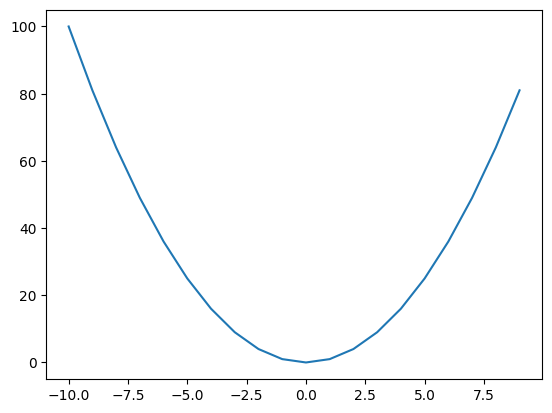

In [60]:
x = np.arange(-10, 10, 1)
f = x ** 2
plt.plot(x, f)
plt.show()

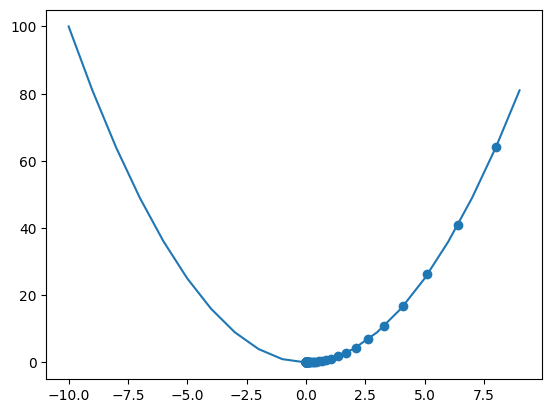

In [61]:
x_new = 10
X = []
Y = []
learning_rate = 0.1

for i in range(100):
  old_value = x_new
  x_new = old_value - learning_rate*2*old_value
  X.append(old_value - learning_rate * 2 * old_value)
  Y.append(x_new ** 2)

plt.plot(x, f)
plt.scatter(X, Y)

### 경사 하강법 (gradient descent)
- 손실함수 J를 최소화하는 계수를 찾아야 함
- 가설함수(hypothesis)는 주어진 데이터에 대해 목적변수를 유추하는 함수(목적 변수를 입력 데이터로 어떻게 표현할지)
- 비용함수(cost)는 한 개의 데이터에 대해 데이터 가설함수 결과(예측 값)과 실제 값의 차이
- 손실함수(loss)는 비용함수의 평균 값

- 아래 계산 된 gradient(p.24)를 활용하여 경사하강을 반복

### sklearn 패키지로 쉽게 해결하기
- sklearn.linear_model.**LinearRegression** - #5
  - 정규방정식을 통해 얻은 결과 제공
  - reg 객체 만든 후
  - fit 메소드를 통해 학습하고
  - predict 메소드를 통해 예측

  - Parameters:
    - fit_intercept: **True**/False (절편 여부)
  - Attribute:
    - coef_: 추정된 계수를 넘파이 배열 형태로 반환
    - intercept_: 절편 추정치를 넘파이 배열 형태로 반환
  - Method:
    - fit(X,y): 데이터를 통해 모형을 적합시킴
    - predict(X): 모형을 통해 X 데이터를 입력 했을 때 타겟 예측 값을 반환
    - get_params: 계수를 딕셔너리 형태로 반환
    - score(X,y): R2값을 반환

- sklearn.linear_model.**SGDRegressor** - #5
  - stochastic gradient descent (경사를 계산하기 위한 데이터를 랜덤하게 지정)
  - reg 객체 만든 후
  - fit 메소드를 통해 학습
  - predict 메소드를 통해 예측

  - Parameters:
    - loss: **'squared_error'**, 'huber', 'epsilion_insensitive'
    - penalty: **'l2'**, 'l1', 'elasticnet', None
    - fit_intercept: **True**/False (절편 여부)
    - max_iter: **1000**
    - eta0: **0.01** (초기 학습율)
    - learning_rate: '**invscaling**', 'constant', 'optimal', 'adaptive'
  - Attribute:
    - coef_: 추정된 계수를 넘파이 배열 형태로 반환
    - intercept_: 절편 추정치를 넘파이 배열 형태로 반환
  - Method:
    - fit(X,y): 데이터를 통해 모형을 적합시킴
    - predict(X): 모형을 통해 X 데이터를 입력 했을 때 타겟 예측 값을 반환
    - get_params: 계수를 딕셔너리 형태로 반환
    - score(X,y): R2값을 반환

## 5. sklearn 패키지로 쉽게 linear regression 문제 해결하기

In [65]:
from sklearn.linear_model import LinearRegression

# X_train이나 X_test로 모델이 예측한 값(y_pred)을 구하는 것

X, y = load_diabetes(return_X_y=True) # 데이터랑 타겟 따로따로 받아오기

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)


reg = LinearRegression() # reg 객체 생성
reg = reg.fit(X_train, y_train) # fit을 통해 학습
y_pred_train = reg.predict(X_train) # 훈련 데이터를 통해 예측, y_train(훈련 데이터의 실제 값)과 비교해 학습 성능 오차 확인

print("학습 데이터셋 MAE: ", np.abs(y_pred_train - y_train).mean())

# 테스트 데이터를 통해 예측, y_test(테스트 데이터 실제 값)과 비교해 모델이 새로운 데이터(test)에 얼마나 잘 일반화되어있는지 확인, 실제 성능
y_pred = reg.predict(X_test)
print("테스트 데이터셋 MAE: ", np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE:  43.54887919565905
테스트 데이터셋 MAE:  42.61770102477777


In [67]:
from sklearn.linear_model import SGDRegressor

In [69]:
reg = SGDRegressor(penalty=None, max_iter=10000, learning_rate='constant', eta0=0.1) # reg 객체 생성
reg = reg.fit(X_train, y_train) # fit을 통해 학습
y_pred_train = reg.predict(X_train)
print("학습 데이터셋 MAE: ", np.abs(y_pred_train - y_train).mean())

y_pred = reg.predict(X_test)
print("테스트 데이터셋 MAE: ", np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE:  44.56556551702323
테스트 데이터셋 MAE:  43.082203247726646


In [70]:
reg.coef_, reg.intercept_, reg.n_features_in_, reg.n_iter_

(array([ -10.47283665, -244.74000139,  483.52873826,  302.20270783,
         -39.12425123, -108.57904039, -209.64126013,  141.90709637,
         405.43770665,  119.24321935]),
 array([157.48228902]),
 10,
 36)

In [71]:
from matplotlib import pyplot as plt

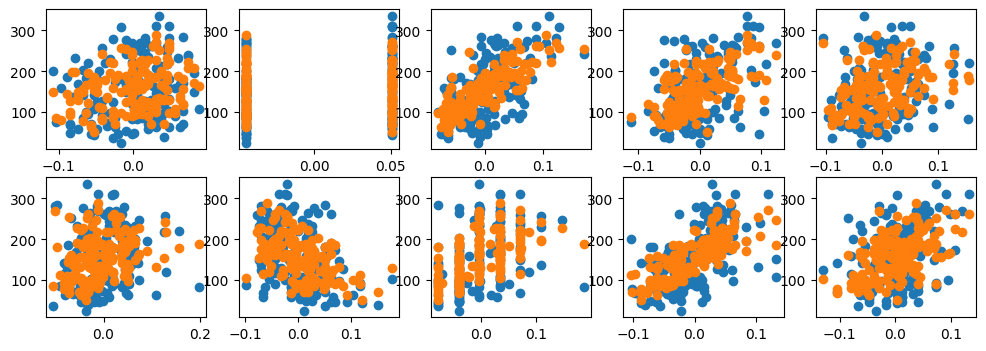

In [72]:
# 파랑 = 실제 값, 주황 = 예측 값
fig= plt.figure(figsize=(12,4))
ax=fig.subplots(2,5)
ax[0,0].scatter(X_test[:,0],y_test)
ax[0,0].scatter(X_test[:,0],y_pred)
ax[0,1].scatter(X_test[:,1],y_test)
ax[0,1].scatter(X_test[:,1],y_pred)
ax[0,2].scatter(X_test[:,2],y_test)
ax[0,2].scatter(X_test[:,2],y_pred)
ax[0,3].scatter(X_test[:,3],y_test)
ax[0,3].scatter(X_test[:,3],y_pred)
ax[0,4].scatter(X_test[:,4],y_test)
ax[0,4].scatter(X_test[:,4],y_pred)

ax[1,0].scatter(X_test[:,5],y_test)
ax[1,1].scatter(X_test[:,6],y_test)
ax[1,2].scatter(X_test[:,7],y_test)
ax[1,3].scatter(X_test[:,8],y_test)
ax[1,4].scatter(X_test[:,9],y_test)


ax[1,0].scatter(X_test[:,5],y_pred)
ax[1,1].scatter(X_test[:,6],y_pred)
ax[1,2].scatter(X_test[:,7],y_pred)
ax[1,3].scatter(X_test[:,8],y_pred)
ax[1,4].scatter(X_test[:,9],y_pred)


### tips 예시

In [86]:
# input feature 5개, target tip
tips = pd.read_csv("./tips.csv")
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [87]:
tips["smoker"] = tips["smoker"].map({"No": 0, "Yes": 1})
tips["day"] = tips["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
tips["time"] = tips["time"].map({"Lunch": 0, "Dinner": 1})
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,3,1,2
1,10.34,1.66,0,3,1,3
2,21.01,3.50,0,3,1,3
3,23.68,3.31,0,3,1,2
4,24.59,3.61,0,3,1,4


In [88]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop(columns="tip"), tips.tip, test_size=0.33, random_state=1234)
X_train

,total_bill,smoker,day,time,size
25,17.81,0,2,1,4
230,24.01,1,2,1,4
210,30.06,1,2,1,3
17,16.29,0,3,1,3
97,12.03,1,1,1,2
...,...,...,...,...,...
204,20.53,1,0,0,4
53,9.94,0,3,1,2
38,18.69,0,2,1,3
211,25.89,1,2,1,4


In [92]:
reg = SGDRegressor(penalty=None, max_iter=10000, learning_rate='constant', eta0=0.01)
reg = reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
print("학습 데이터셋 MAE: ", np.abs(y_pred_train - y_train).mean())

y_pred = reg.predict(X_test)
print("테스트 데이터셋 MAE: ", np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE:  3348720349625.118
테스트 데이터셋 MAE:  3776805498738.8047


In [95]:
reg = SGDRegressor(penalty=None, max_iter=10000, learning_rate='constant', eta0=0.001)
reg = reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
print("학습 데이터셋 MAE: ", np.abs(y_pred_train - y_train).mean())

y_pred = reg.predict(X_test)
print("테스트 데이터셋 MAE: ", np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE:  0.745243962181407
테스트 데이터셋 MAE:  0.7705084590091829


In [96]:
reg.coef_, reg.intercept_, reg.n_features_in_, reg.n_iter_

(array([ 0.08340228,  0.07578459,  0.06004045, -0.04808245,  0.32465657]),
 array([0.18755426]),
 5,
 15)

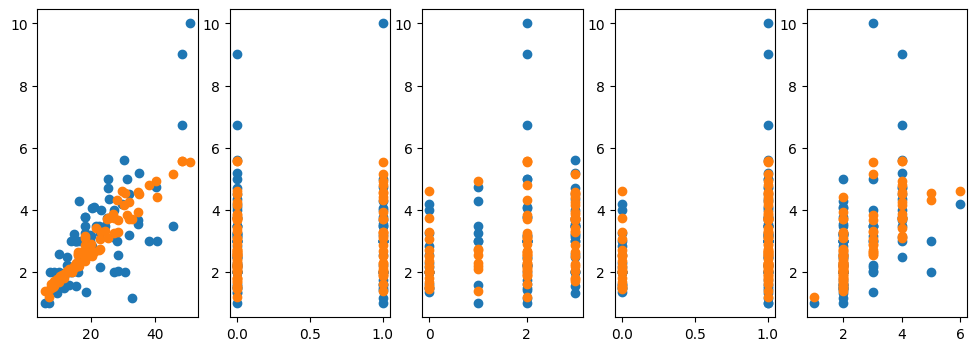

In [97]:
fig= plt.figure(figsize=(12,4))
ax=fig.subplots(1,5)
ax[0].scatter(X_test.iloc[:,0],y_test)
ax[0].scatter(X_test.iloc[:,0],y_pred)
ax[1].scatter(X_test.iloc[:,1],y_test)
ax[1].scatter(X_test.iloc[:,1],y_pred)
ax[2].scatter(X_test.iloc[:,2],y_test)
ax[2].scatter(X_test.iloc[:,2],y_pred)
ax[3].scatter(X_test.iloc[:,3],y_test)
ax[3].scatter(X_test.iloc[:,3],y_pred)
ax[4].scatter(X_test.iloc[:,4],y_test)
ax[4].scatter(X_test.iloc[:,4],y_pred)